## RedSox
<img src="http://baseball.derekmiller.us/images/logos/redSox.png">

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tabulate import tabulate
plt.style.use('seaborn-bright')

## Data

In [6]:
# url for each year

url_2020 = 'https://www.baseball-reference.com/teams/BOS/2020-schedule-scores.shtml'
url_2019 = 'https://www.baseball-reference.com/teams/BOS/2019-schedule-scores.shtml'
url_2018 = 'https://www.baseball-reference.com/teams/BOS/2018-schedule-scores.shtml'
url_2017 = 'https://www.baseball-reference.com/teams/BOS/2017-schedule-scores.shtml'
url_2016 = 'https://www.baseball-reference.com/teams/BOS/2016-schedule-scores.shtml'
url_2015 = 'https://www.baseball-reference.com/teams/BOS/2015-schedule-scores.shtml'

# DataFrame for each year

df_2020 = pd.read_html(url_2020)[0]
df_2019 = pd.read_html(url_2019)[0]
df_2018 = pd.read_html(url_2018)[0]
df_2017 = pd.read_html(url_2017)[0]
df_2016 = pd.read_html(url_2016)[0]
df_2015 = pd.read_html(url_2015)[0]

# create list of all DataFrames

years = [df_2020, df_2019, df_2018, df_2017, df_2016, df_2015]

# Concat all df together
r_data = pd.concat(years)

r_data = r_data[r_data['Gm#'] != 'Gm#']


In [7]:
r_data.head()

,Gm#,Date,Unnamed: 2,Tm,Unnamed: 4,Opp,W/L,R,RA,Inn,...,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
0,1,"Friday, Jul 24",boxscore,BOS,NaN,BAL,W,13,2,NaN,...,Tied,Eovaldi,Milone,NaN,3:18,N,NaN,1.16,+,NaN
1,2,"Saturday, Jul 25",boxscore,BOS,NaN,BAL,L,2,7,NaN,...,Tied,Cobb,Perez,NaN,3:01,D,NaN,1.18,-,NaN
2,3,"Sunday, Jul 26",boxscore,BOS,NaN,BAL,L,4,7,NaN,...,1.0,LeBlanc,Weber,Sulser,3:13,D,NaN,1.19,--,NaN
3,4,"Monday, Jul 27",boxscore,BOS,NaN,NYM,L,4,7,NaN,...,2.0,Wacha,Osich,Lugo,3:11,N,NaN,1.07,---,NaN
4,5,"Tuesday, Jul 28",boxscore,BOS,NaN,NYM,L,3,8,NaN,...,3.0,Peterson,Hall,NaN,2:58,N,NaN,1.04,----,NaN


In [8]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 0 to 167
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gm#              870 non-null    object
 1   Date             870 non-null    object
 2   Unnamed: 2       870 non-null    object
 3   Tm               870 non-null    object
 4   Unnamed: 4       434 non-null    object
 5   Opp              870 non-null    object
 6   W/L              870 non-null    object
 7   R                870 non-null    object
 8   RA               870 non-null    object
 9   Inn              83 non-null     object
 10  W-L              870 non-null    object
 11  Rank             870 non-null    object
 12  GB               870 non-null    object
 13  Win              870 non-null    object
 14  Loss             870 non-null    object
 15  Save             412 non-null    object
 16  Time             870 non-null    object
 17  D/N              870 non-null    ob

W       448
L       358
W-wo     32
L-wo     32
Name: W/L, dtype: int64


<AxesSubplot:>

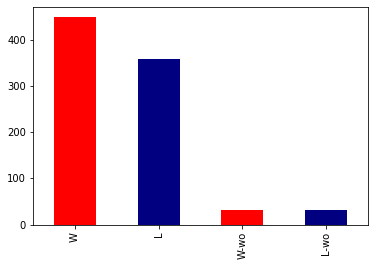

In [23]:
wvl = r_data['W/L'].value_counts()
print(wvl)
wvl.plot(kind='bar', color=['red', 'navy'])

In [30]:
def against_opp(opp):
    opp_data = r_data[r_data['Opp'] == opp.upper()]
    opp_wvl = opp_data['W/L'].value_counts()
    print(opp_data.head())
    print()
    print(opp_wvl)
    opp_wvl.plot(kind='bar', color=['red', 'navy'])
    

   Gm#              Date Unnamed: 2   Tm Unnamed: 4  Opp W/L  R  RA  Inn  ...  \
7    8    Friday, Jul 31   boxscore  BOS          @  NYY   L  1   5  NaN  ...   
9    9   Saturday, Aug 1   boxscore  BOS          @  NYY   L  2   5  NaN  ...   
10  10     Sunday, Aug 2   boxscore  BOS          @  NYY   L  7   9  NaN  ...   
20  20    Friday, Aug 14   boxscore  BOS          @  NYY   L  3  10  NaN  ...   
21  21  Saturday, Aug 15   boxscore  BOS          @  NYY   L  5  11  NaN  ...   

     GB         Win     Loss     Save  Time D/N Attendance   cLI  Streak  \
7   3.0  Montgomery    Weber      NaN  3:08   N        NaN  1.22       -   
9   4.0      Nelson   Godley     Hale  3:07   N        NaN  1.17      --   
10  5.0    Ottavino   Barnes  Britton  3:12   N        NaN  1.10     ---   
20  7.5        Cole   Brewer      NaN  3:35   N        NaN   .65   -----   
21  8.5      Paxton  Eovaldi      NaN  3:05   N        NaN   .53  ------   

   Orig. Scheduled  
7              NaN  
9             

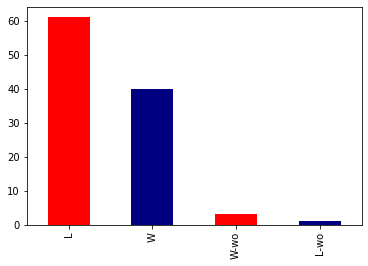

In [31]:
against_opp('nyy')